# Diabetes Prediction Model: MS Business Analytics Capstone Project
# Jitika Salhan

# Data Pre-processing

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('health care diabetes 2.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset shape: (768, 9)

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
# Identify columns with zero values that should be treated as missing
# For physiological measurements like Glucose, BloodPressure, zero values are not possible
zero_not_possible = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN in these columns
for column in zero_not_possible:
    df[column] = df[column].replace(0, np.nan)

# Check missing values count after replacement
print("\nMissing values after zero replacement:")
print(df.isnull().sum())


Missing values after zero replacement:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [4]:
# Check percentage of missing values
print("\nPercentage of missing values:")
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


Percentage of missing values:
Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64


In [5]:

# Handle missing values based on distribution
# For columns with high missingness (>5%), use random sampling from non-missing values
# For columns with low missingness (<5%), use mean imputation

# Random sampling imputation for SkinThickness and Insulin (high missingness)
df["SkinThickness"][df["SkinThickness"].isnull()] = df["SkinThickness"].dropna().sample(
    df["SkinThickness"].isnull().sum(), random_state=42).values

df["Insulin"][df["Insulin"].isnull()] = df["Insulin"].dropna().sample(
    df["Insulin"].isnull().sum(), random_state=42).values

# Mean imputation for Glucose, BloodPressure, and BMI (low missingness)
mean_imputation_columns = ['Glucose', 'BloodPressure', 'BMI']
for column in mean_imputation_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Verify all missing values are handled
print("\nRemaining missing values after imputation:")
print(df.isnull().sum())


Remaining missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/var/folders/c5/fk6klhbd6d57vfx019x0yldw0000gn/T/ipykernel_18106/2238902194.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["SkinThickness"][df["SkinThickness"].isnull()] = df["SkinThickness"].dropna().sample(
/var/folders/c5/fk6klhbd

In [6]:
# Check balance of classes in the target variable
print("\nClass distribution in target variable:")
print(df["Outcome"].value_counts())
print(f"Percentage of diabetic patients: {df['Outcome'].mean() * 100:.2f}%")


Class distribution in target variable:
Outcome
0    500
1    268
Name: count, dtype: int64
Percentage of diabetic patients: 34.90%


/var/folders/c5/fk6klhbd6d57vfx019x0yldw0000gn/T/ipykernel_18106/3212761734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Outcome', data=df, palette=['#66b3ff', '#ff9999'])


([<matplotlib.axis.XTick at 0x12c8a5940>,
 [Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')])

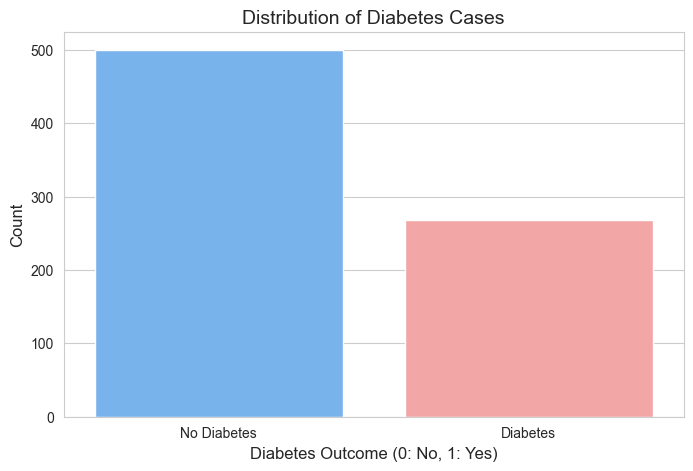

In [7]:
# Visualize class imbalance
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Outcome', data=df, palette=['#66b3ff', '#ff9999'])
plt.title('Distribution of Diabetes Cases', fontsize=14)
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])

In [8]:
# Handle class imbalance using SMOTE
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())
print(f"Training data shape before SMOTE: {X_train.shape}")
print(f"Training data shape after SMOTE: {X_train_resampled.shape}")

# Save preprocessed data for modeling phase
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
preprocessed_data = {
    'X_train': X_train_resampled_df,
    'X_test': X_test,
    'y_train': y_train_resampled,
    'y_test': y_test
}

print("\nPreprocessing completed successfully. Data is ready for modeling.")


Class distribution after SMOTE:
Outcome
0    400
1    400
Name: count, dtype: int64
Training data shape before SMOTE: (614, 8)
Training data shape after SMOTE: (800, 8)

Preprocessing completed successfully. Data is ready for modeling.


# Correlation Analysis

Correlation with Diabetes Outcome:
Outcome                     1.000000
Glucose                     0.492928
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.166962
BloodPressure               0.166074
SkinThickness               0.152109
Name: Outcome, dtype: float64


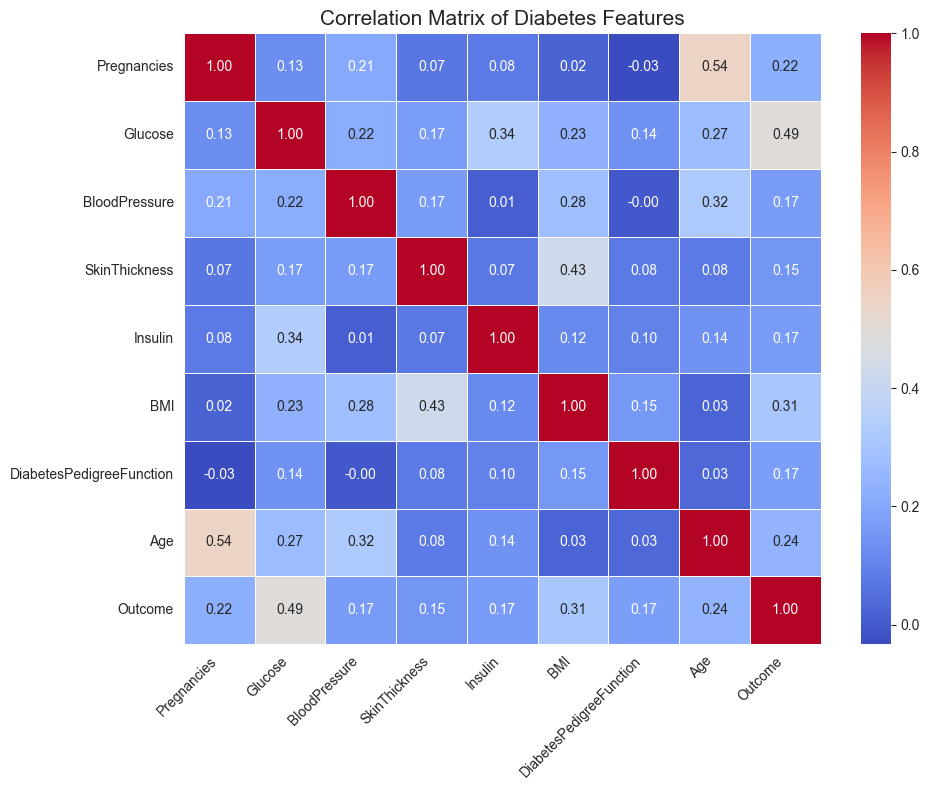

In [9]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Display the correlation with the target variable (Outcome)
print("Correlation with Diabetes Outcome:")
print(correlation_matrix['Outcome'].sort_values(ascending=False))

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Diabetes Features', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

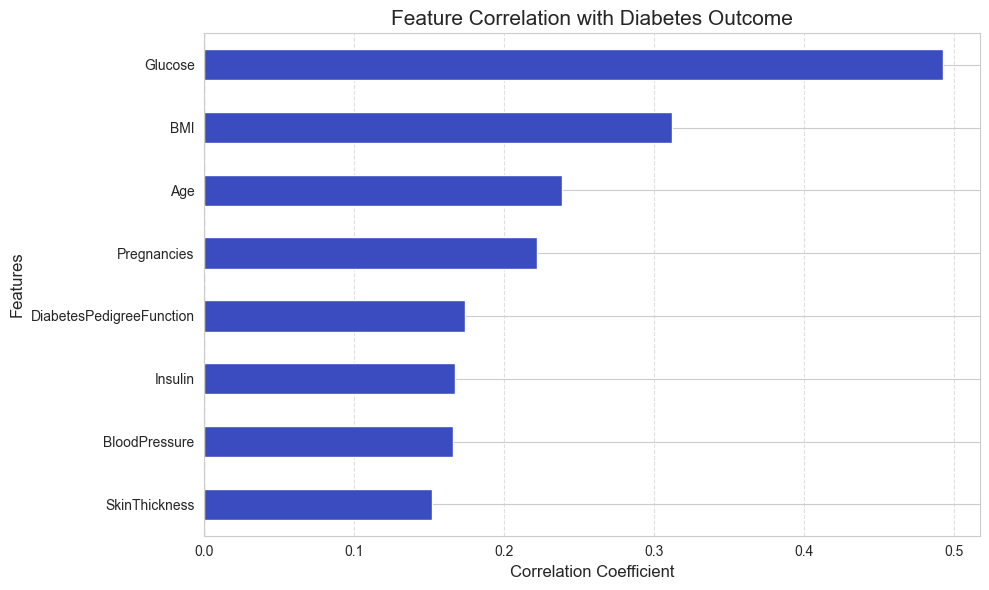

In [10]:
# Create a bar plot to highlight correlations with the target variable
plt.figure(figsize=(10, 6))
correlation_with_target = correlation_matrix['Outcome'].drop('Outcome')
correlation_with_target.sort_values().plot(kind='barh', colormap='coolwarm')
plt.title('Feature Correlation with Diabetes Outcome', fontsize=15)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [11]:
# Identify strongly correlated features (potential multicollinearity)
print("\nStrongly correlated features (absolute correlation > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            print(f"{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")


Strongly correlated features (absolute correlation > 0.5):
Age and Pregnancies: 0.54


# Visualizations

DataFrame shape: (768, 9)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


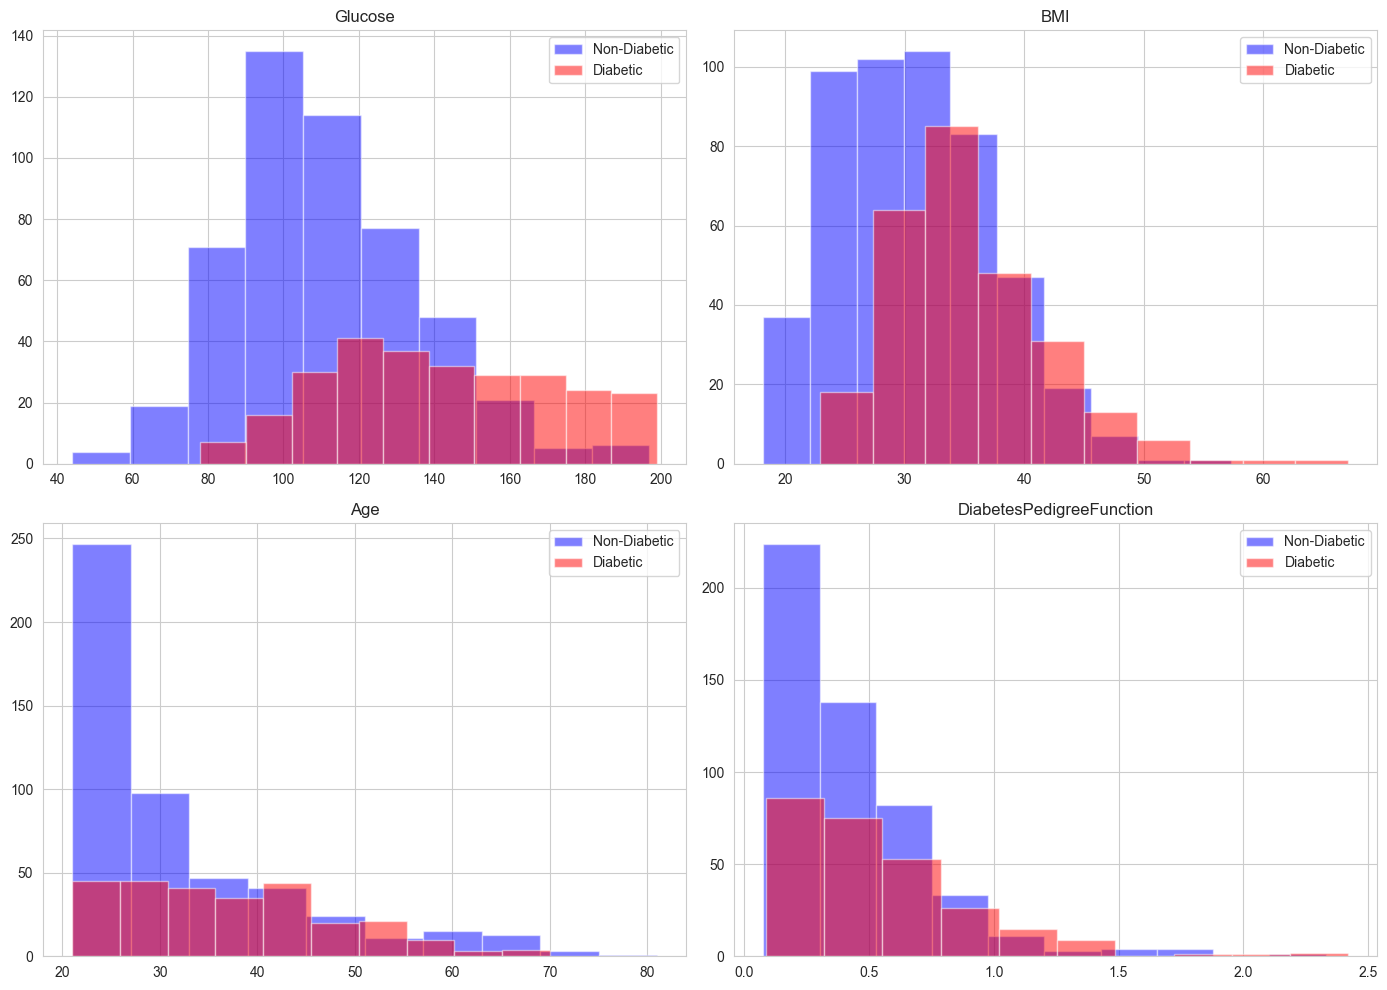

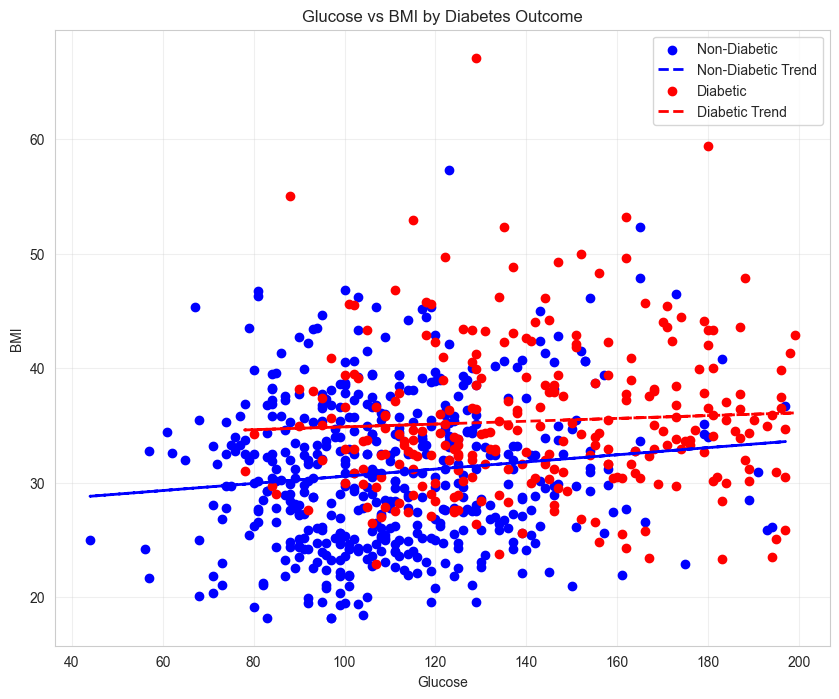

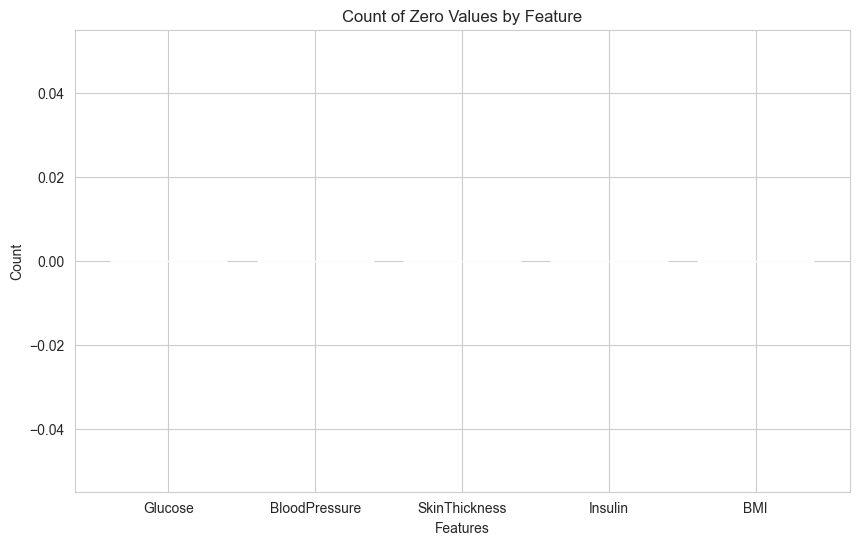

Visualizations complete!


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Print info about the dataframe to confirm it's loaded
print(f"DataFrame shape: {df.shape}")
print("Columns:", df.columns.tolist())

# 1. Feature distributions by outcome (only for top 4 features)
key_features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    # Simple histograms
    axes[i].hist(df[df['Outcome'] == 0][feature], bins=10, alpha=0.5, color='blue', label='Non-Diabetic')
    axes[i].hist(df[df['Outcome'] == 1][feature], bins=10, alpha=0.5, color='red', label='Diabetic')
    axes[i].set_title(feature)
    axes[i].legend()

plt.tight_layout()
plt.savefig('feature_distributions.png')
plt.show()

# 2. Simple Scatter Plot of Glucose vs BMI
plt.figure(figsize=(10, 8))

# Non-diabetic patients (blue)
x_non_diabetic = df[df['Outcome'] == 0]['Glucose']
y_non_diabetic = df[df['Outcome'] == 0]['BMI']
plt.scatter(x_non_diabetic, y_non_diabetic, color='blue', label='Non-Diabetic')

# Trend line for non-diabetic patients
z_non_diabetic = np.polyfit(x_non_diabetic, y_non_diabetic, 1)
p_non_diabetic = np.poly1d(z_non_diabetic)
plt.plot(x_non_diabetic, p_non_diabetic(x_non_diabetic), "b--", linewidth=2, label='Non-Diabetic Trend')

# Diabetic patients (red)
x_diabetic = df[df['Outcome'] == 1]['Glucose']
y_diabetic = df[df['Outcome'] == 1]['BMI']
plt.scatter(x_diabetic, y_diabetic, color='red', label='Diabetic')

# Trend line for diabetic patients
z_diabetic = np.polyfit(x_diabetic, y_diabetic, 1)
p_diabetic = np.poly1d(z_diabetic)
plt.plot(x_diabetic, p_diabetic(x_diabetic), "r--", linewidth=2, label='Diabetic Trend')

plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Glucose vs BMI by Diabetes Outcome')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('glucose_bmi_scatter.png')
plt.show()

# 3. Simple count of zero values (missing data)
zero_counts = {}
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    zero_counts[column] = (df[column] == 0).sum()

plt.figure(figsize=(10, 6))
plt.bar(zero_counts.keys(), zero_counts.values(), color='skyblue')
plt.title('Count of Zero Values by Feature')
plt.xlabel('Features')
plt.ylabel('Count')
plt.savefig('zero_counts.png')
plt.show()

print("Visualizations complete!")

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# We'll use the preprocessed data from earlier
# X_train_resampled, y_train_resampled, X_test, y_test

# Create and train the logistic regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on test data
y_pred = lr_model.predict(X_test)
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the performance metrics
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Display more detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Model Performance:
Accuracy: 0.7013
Precision: 0.5645
Recall: 0.6481
F1 Score: 0.6034
ROC AUC Score: 0.8065

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       100
           1       0.56      0.65      0.60        54

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.70      0.71       154



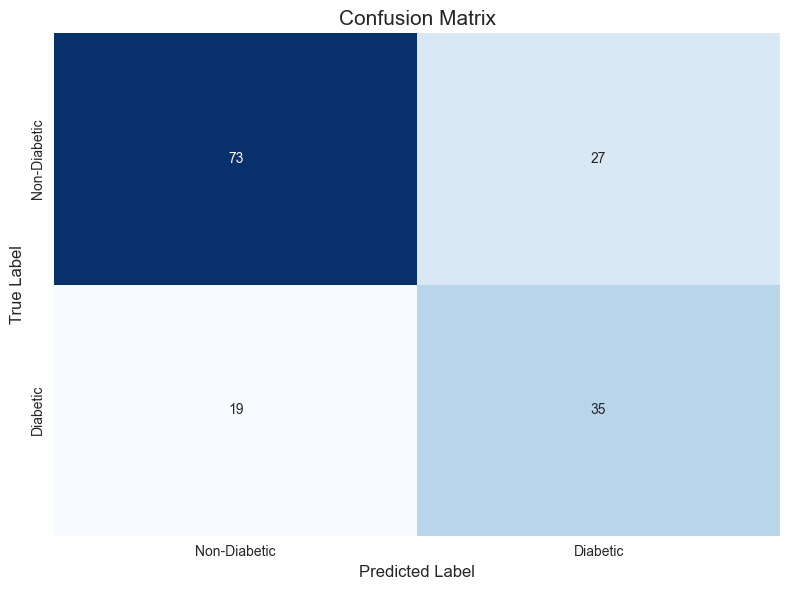

In [14]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks([0.5, 1.5], ['Non-Diabetic', 'Diabetic'])
plt.yticks([0.5, 1.5], ['Non-Diabetic', 'Diabetic'])
plt.tight_layout()
plt.show()

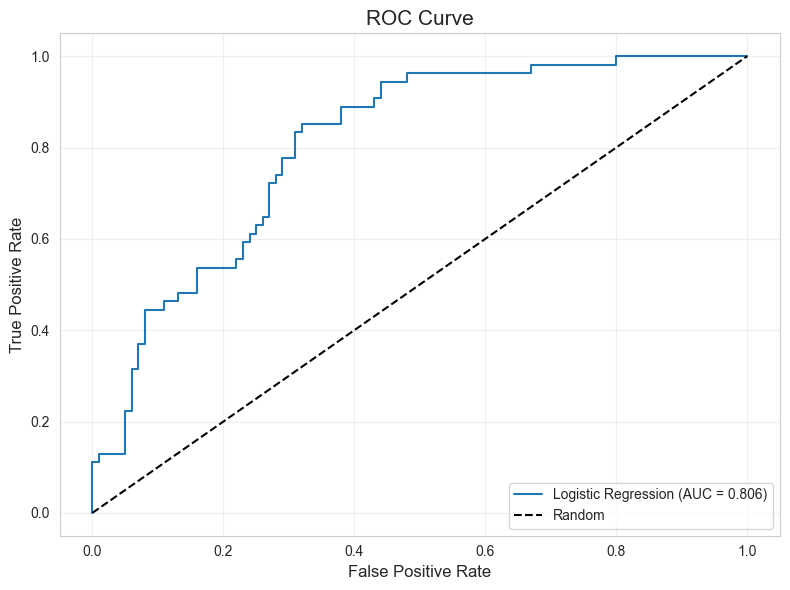

In [15]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=15)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

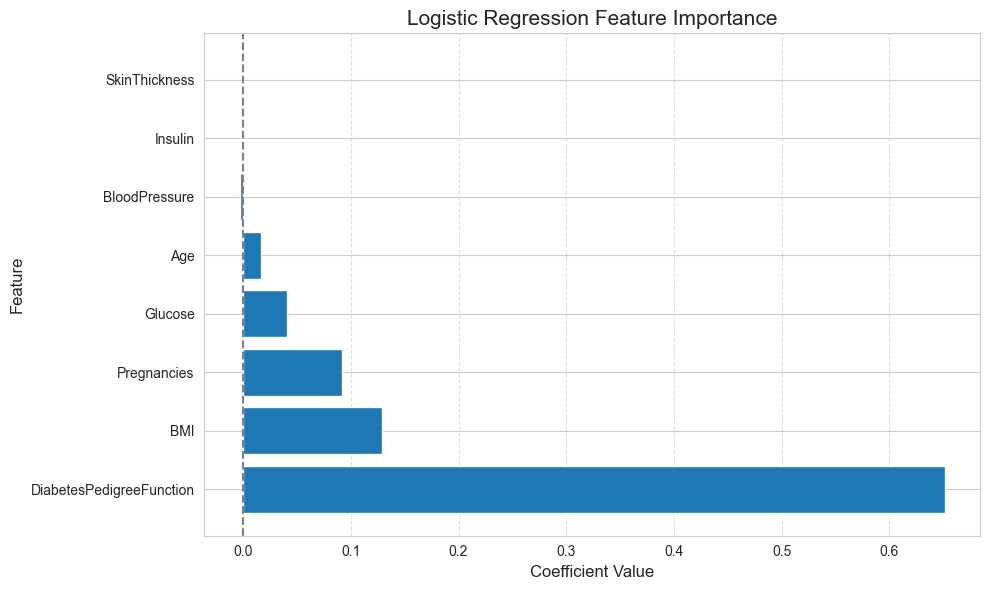

In [16]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_[0]
})
feature_importance['Absolute_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Absolute_Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Logistic Regression Feature Importance', fontsize=15)
plt.axvline(x=0, color='gray', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [17]:
# Print the feature coefficients
print("\nFeature Coefficients (ordered by importance):")
for index, row in feature_importance.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']:.4f}")


Feature Coefficients (ordered by importance):
DiabetesPedigreeFunction: 0.6516
BMI: 0.1290
Pregnancies: 0.0919
Glucose: 0.0411
Age: 0.0161
BloodPressure: -0.0033
Insulin: -0.0013
SkinThickness: -0.0010


# Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on test data
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Print the performance metrics
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")

# Display more detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model Performance:
Accuracy: 0.7597
Precision: 0.6393
Recall: 0.7222
F1 Score: 0.6783
ROC AUC Score: 0.8070

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       100
           1       0.64      0.72      0.68        54

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



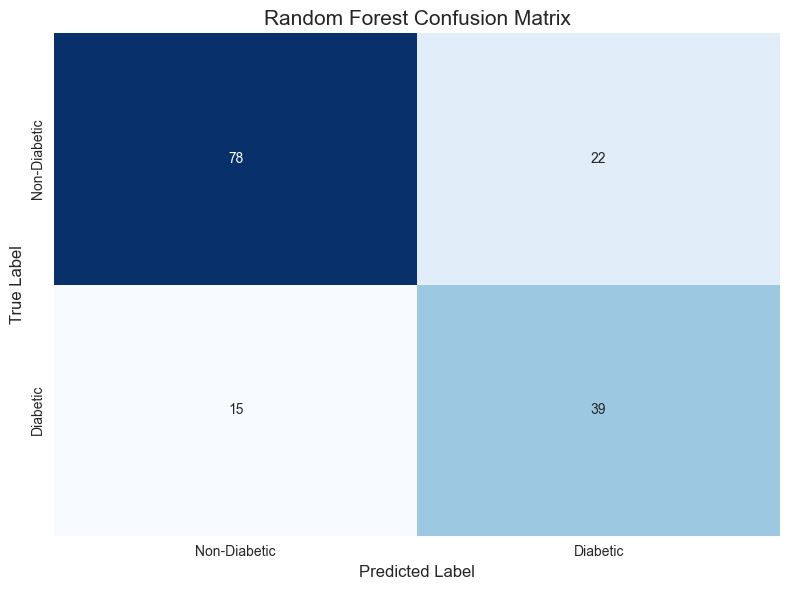

In [19]:
# Create a confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks([0.5, 1.5], ['Non-Diabetic', 'Diabetic'])
plt.yticks([0.5, 1.5], ['Non-Diabetic', 'Diabetic'])
plt.tight_layout()
plt.show()

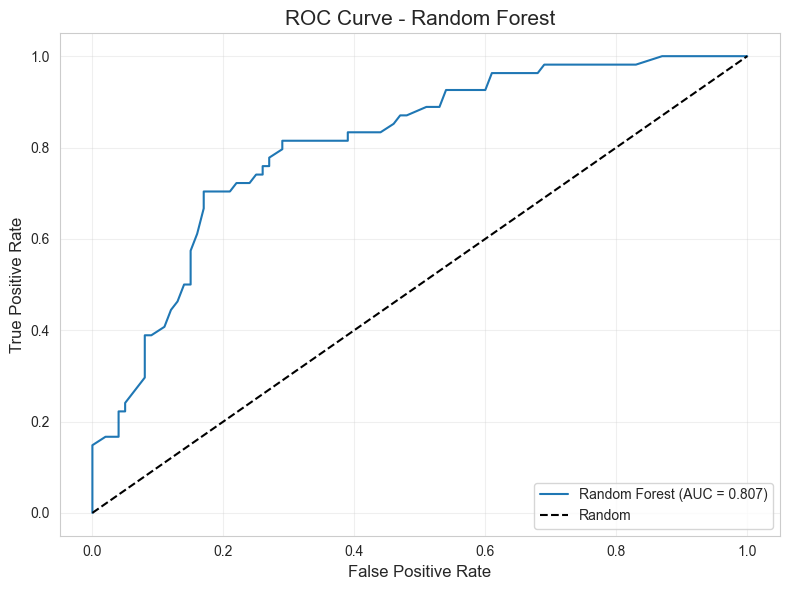

In [20]:
# Plot ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Random Forest', fontsize=15)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

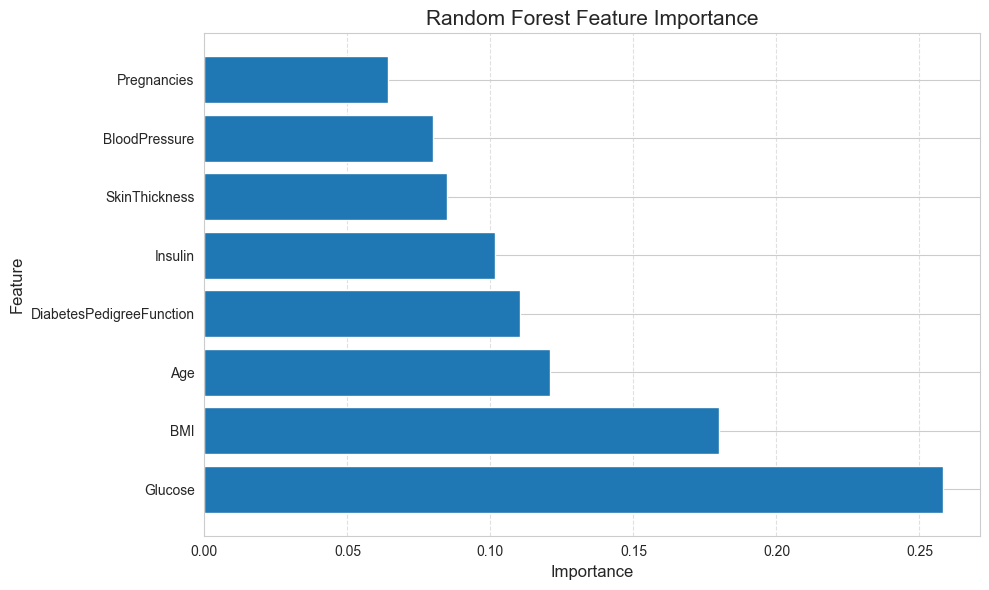


Feature Importance (ordered):
Glucose: 0.2583
BMI: 0.1799
Age: 0.1209
DiabetesPedigreeFunction: 0.1103
Insulin: 0.1014
SkinThickness: 0.0849
BloodPressure: 0.0801
Pregnancies: 0.0642


In [21]:
# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance_rf = feature_importance_rf.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'])
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Random Forest Feature Importance', fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print the feature importance
print("\nFeature Importance (ordered):")
for index, row in feature_importance_rf.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

# Support Vector Machine (SVM)

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Create and train the SVM model
# Using a radial basis function (RBF) kernel which works well for many problems
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on test data
y_pred_svm = svm_model.predict(X_test)
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_prob_svm)

# Print the performance metrics
print("SVM Model Performance:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"ROC AUC Score: {roc_auc_svm:.4f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Model Performance:
Accuracy: 0.6818
Precision: 0.5397
Recall: 0.6296
F1 Score: 0.5812
ROC AUC Score: 0.7654

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       100
           1       0.54      0.63      0.58        54

    accuracy                           0.68       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.70      0.68      0.69       154



# Gradient Boosting Implementation

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Create and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on test data
y_pred_gb = gb_model.predict(X_test)
y_pred_prob_gb = gb_model.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate performance metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_prob_gb)

# Print the performance metrics
print("Gradient Boosting Model Performance:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}")
print(f"ROC AUC Score: {roc_auc_gb:.4f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Model Performance:
Accuracy: 0.7727
Precision: 0.6508
Recall: 0.7593
F1 Score: 0.7009
ROC AUC Score: 0.8272

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       100
           1       0.65      0.76      0.70        54

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.78      0.77      0.78       154



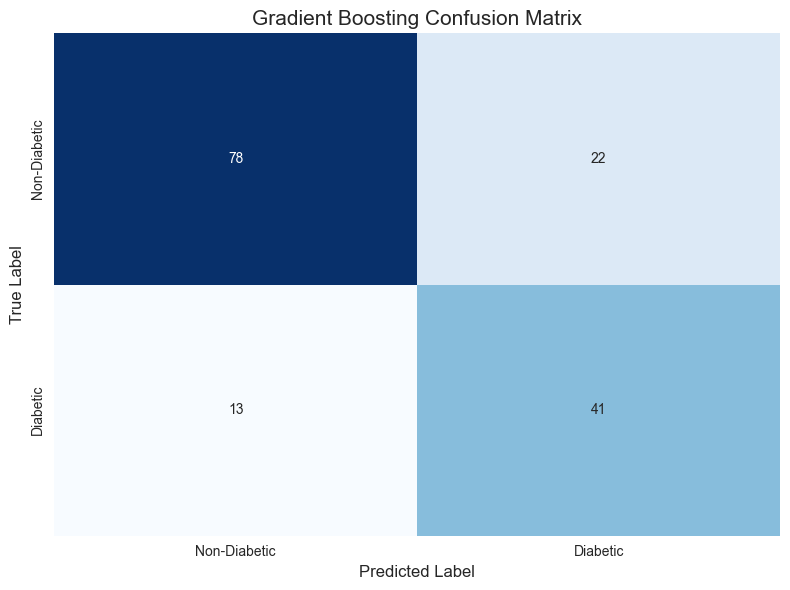

In [24]:
# Create a confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Gradient Boosting Confusion Matrix', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks([0.5, 1.5], ['Non-Diabetic', 'Diabetic'])
plt.yticks([0.5, 1.5], ['Non-Diabetic', 'Diabetic'])
plt.tight_layout()
plt.show()

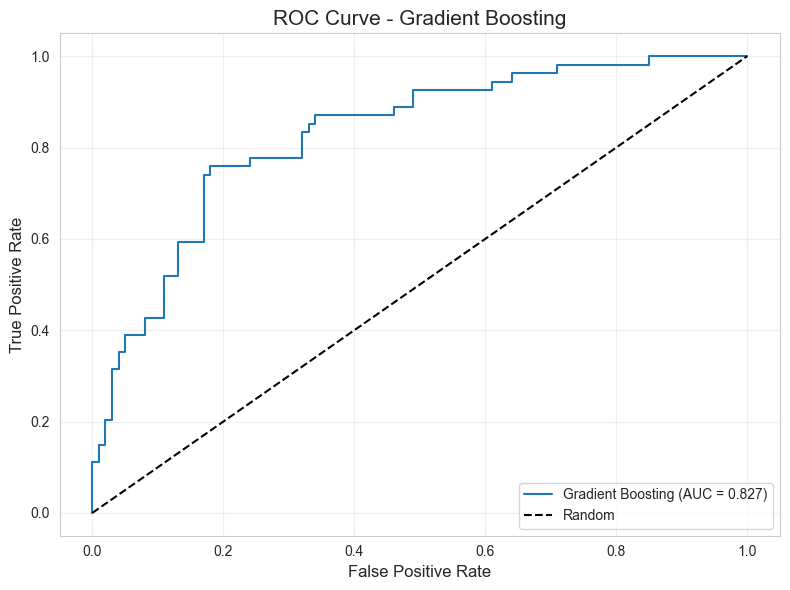

In [25]:
# Plot ROC curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Gradient Boosting', fontsize=15)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

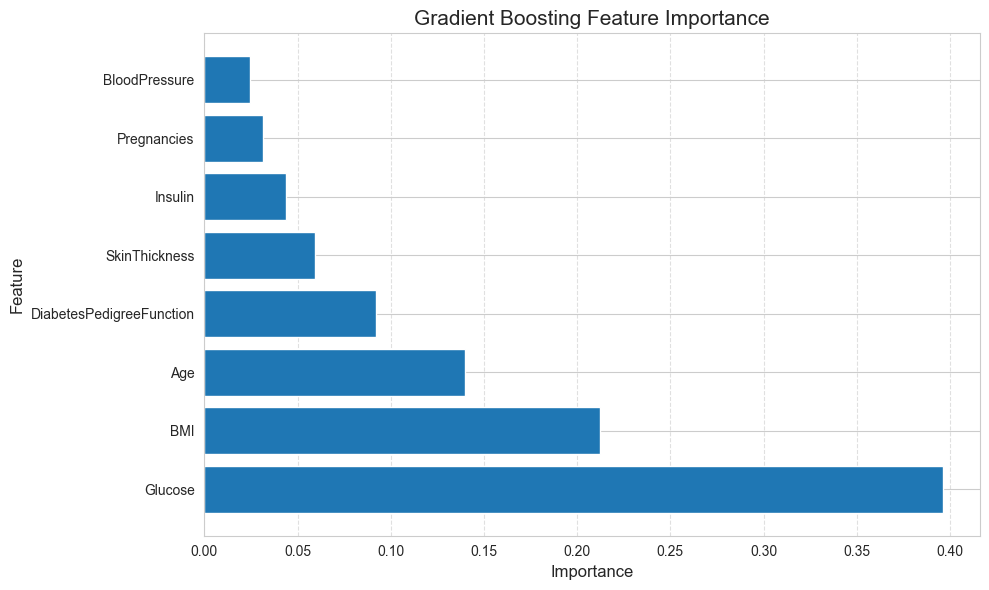


Feature Importance (ordered):
Glucose: 0.3963
BMI: 0.2124
Age: 0.1399
DiabetesPedigreeFunction: 0.0922
SkinThickness: 0.0594
Insulin: 0.0436
Pregnancies: 0.0316
BloodPressure: 0.0246


In [26]:
# Plot feature importance
feature_importance_gb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
})
feature_importance_gb = feature_importance_gb.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_gb['Feature'], feature_importance_gb['Importance'])
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Gradient Boosting Feature Importance', fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print the feature importance
print("\nFeature Importance (ordered):")
for index, row in feature_importance_gb.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

# Models Comparison

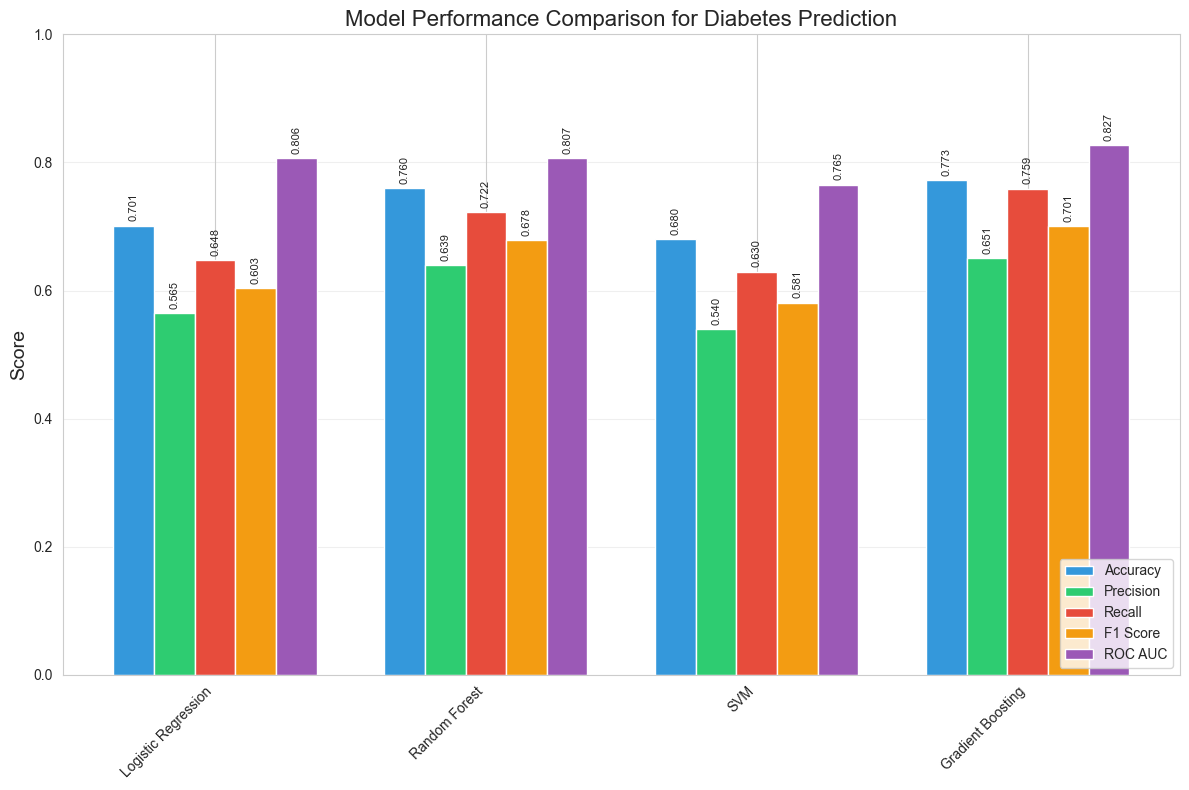

Detailed Model Comparison:
              Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
Logistic Regression    0.7013     0.5645  0.6481    0.6034   0.8065
      Random Forest    0.7597     0.6393  0.7222    0.6783   0.8070
                SVM    0.6800     0.5400  0.6296    0.5812   0.7654
  Gradient Boosting    0.7727     0.6508  0.7593    0.7009   0.8272

Best Model for Each Metric:
Accuracy: Gradient Boosting
Precision: Gradient Boosting
Recall: Gradient Boosting
F1 Score: Gradient Boosting
ROC AUC: Gradient Boosting

Feature Importance Comparison Across Models:
Logistic Regression:
DiabetesPedigreeFunction: 0.6516, BMI: 0.1290, Pregnancies: 0.0919, Glucose: 0.0411, Age: 0.0161

Random Forest:
Glucose: 0.2583, BMI: 0.1799, Age: 0.1209, DiabetesPedigreeFunction: 0.1103, Insulin: 0.1014

Gradient Boosting:
Glucose: 0.3963, BMI: 0.2124, Age: 0.1399, DiabetesPedigreeFunction: 0.0922, SkinThickness: 0.0594


In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

models = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting']

# Actual metrics from your output screenshots
accuracy = [0.7013, 0.7597, 0.6800, 0.7727]
precision = [0.5645, 0.6393, 0.5400, 0.6508]
recall = [0.6481, 0.7222, 0.6296, 0.7593]
f1 = [0.6034, 0.6783, 0.5812, 0.7009]
roc_auc = [0.8065, 0.8070, 0.7654, 0.8272]

# Set up bar chart
x = np.arange(len(models))
width = 0.15

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars
bars1 = ax.bar(x - width*2, accuracy, width, label='Accuracy', color='#3498db')
bars2 = ax.bar(x - width, precision, width, label='Precision', color='#2ecc71')
bars3 = ax.bar(x, recall, width, label='Recall', color='#e74c3c')
bars4 = ax.bar(x + width, f1, width, label='F1 Score', color='#f39c12')
bars5 = ax.bar(x + width*2, roc_auc, width, label='ROC AUC', color='#9b59b6')

# Add labels, title and legend
ax.set_ylabel('Score', fontsize=14)
ax.set_title('Model Performance Comparison for Diabetes Prediction', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend(loc='lower right')

# Add value labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90, fontsize=8)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)
add_labels(bars5)

# Adjust layout and display
plt.ylim(0, 1.0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a table with all the metrics for a more detailed comparison
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
})

print("Detailed Model Comparison:")
print(metrics_df.round(4).to_string(index=False))

# Find the best model for each metric
best_model = {}
best_model['Accuracy'] = models[np.argmax(accuracy)]
best_model['Precision'] = models[np.argmax(precision)]
best_model['Recall'] = models[np.argmax(recall)]
best_model['F1 Score'] = models[np.argmax(f1)]
best_model['ROC AUC'] = models[np.argmax(roc_auc)]

print("\nBest Model for Each Metric:")
for metric, model in best_model.items():
    print(f"{metric}: {model}")

# Create a feature importance comparison
print("\nFeature Importance Comparison Across Models:")
print("Logistic Regression:")
print("DiabetesPedigreeFunction: 0.6516, BMI: 0.1290, Pregnancies: 0.0919, Glucose: 0.0411, Age: 0.0161")

print("\nRandom Forest:")
print("Glucose: 0.2583, BMI: 0.1799, Age: 0.1209, DiabetesPedigreeFunction: 0.1103, Insulin: 0.1014")

print("\nGradient Boosting:")
print("Glucose: 0.3963, BMI: 0.2124, Age: 0.1399, DiabetesPedigreeFunction: 0.0922, SkinThickness: 0.0594")

# Visualizations

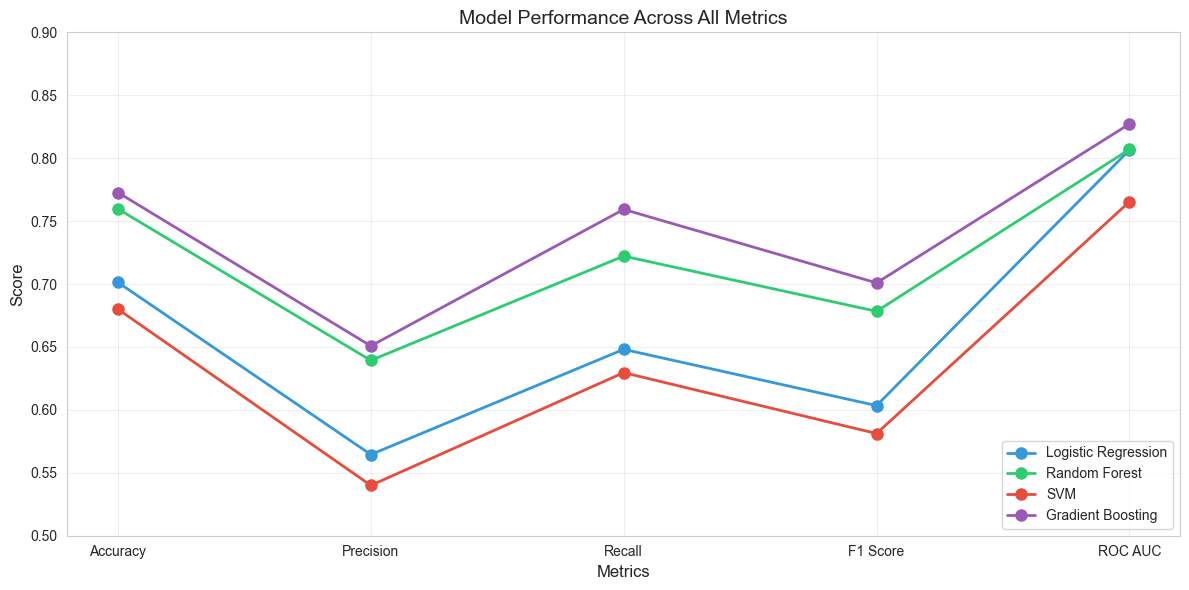

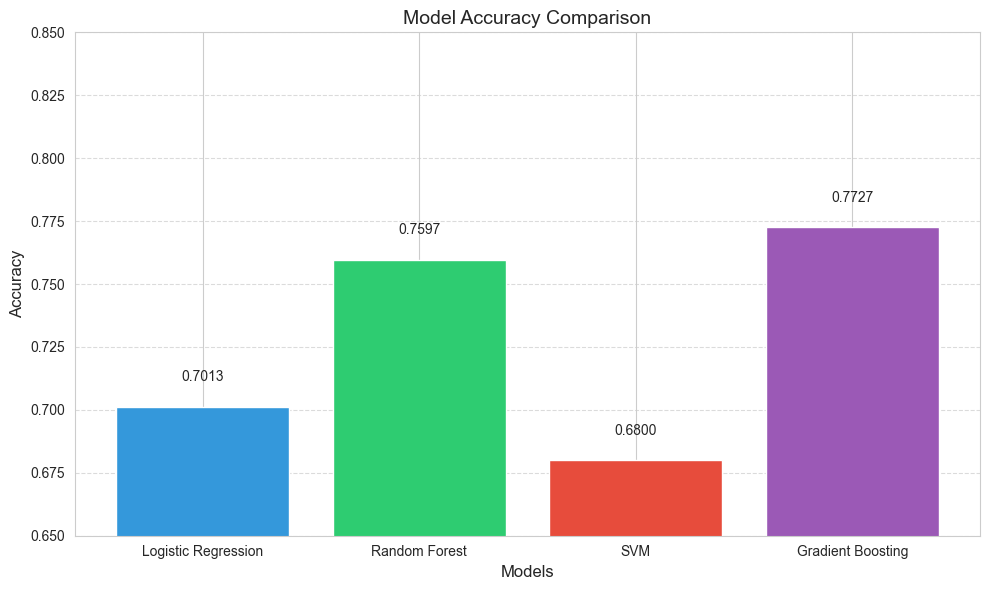

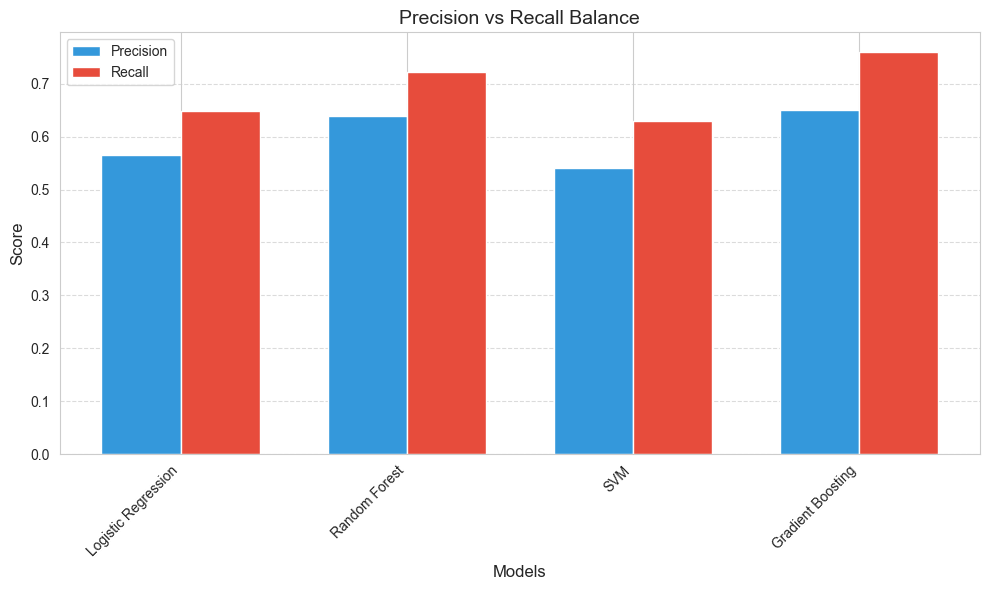

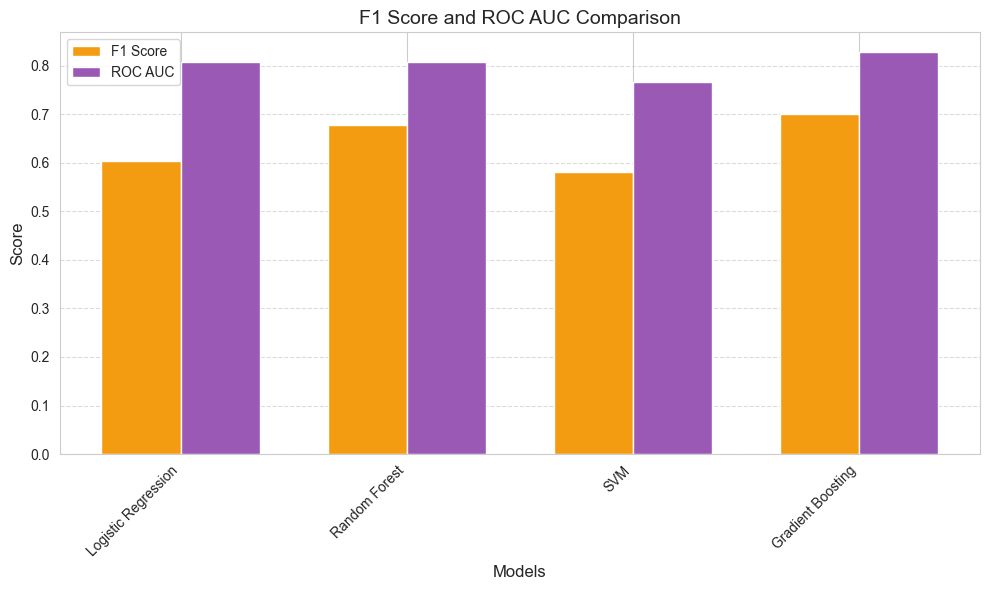

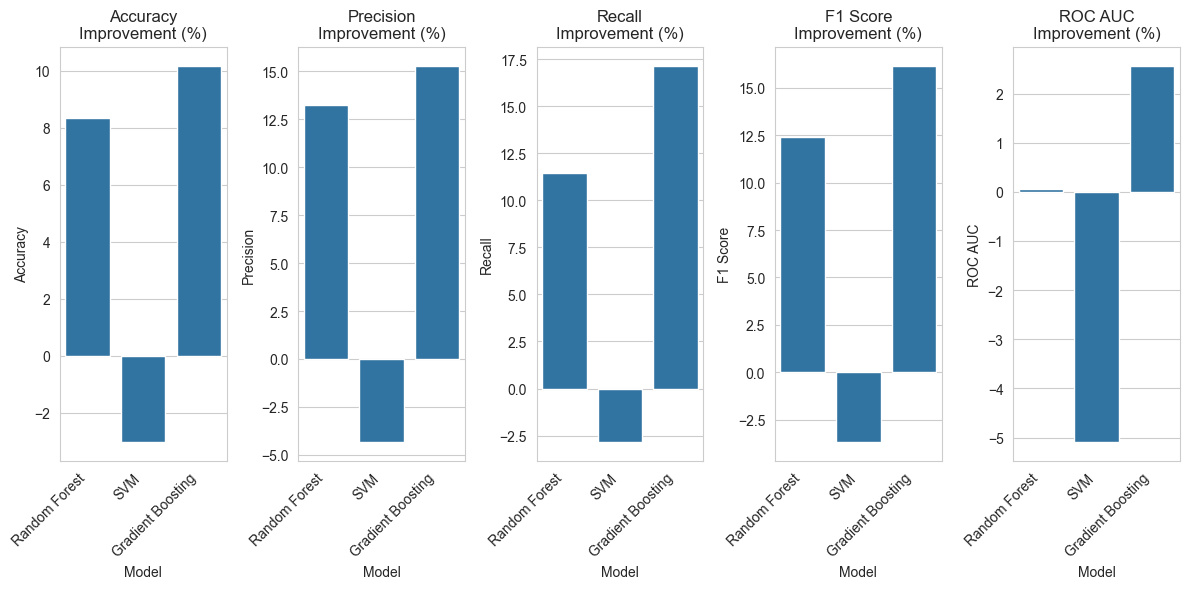

In [28]:
# Model Comparison Line Charts
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set model names and performance metrics from your results
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting']

# Metrics from your model outputs
accuracy = [0.7013, 0.7597, 0.6800, 0.7727]
precision = [0.5645, 0.6393, 0.5400, 0.6508]
recall = [0.6481, 0.7222, 0.6296, 0.7593]
f1 = [0.6034, 0.6783, 0.5812, 0.7009]
roc_auc = [0.8065, 0.8070, 0.7654, 0.8272]

# Create a DataFrame with all metrics
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
})

# Set the style
sns.set_style("whitegrid")
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']

# 1. Overall Performance Chart (All Key Metrics)
plt.figure(figsize=(12, 6))
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

for i, model in enumerate(models):
    model_data = metrics_df[metrics_df['Model'] == model]
    values = [model_data[metric].values[0] for metric in metric_names]
    plt.plot(metric_names, values, 'o-', linewidth=2, label=model, color=colors[i], markersize=8)

plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Model Performance Across All Metrics', fontsize=14)
plt.legend(loc='lower right')
plt.ylim(0.5, 0.9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('overall_performance.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Classification Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=colors)
for i, v in enumerate(accuracy):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', fontsize=10)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylim(0.65, 0.85)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Precision-Recall Balance
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, precision, width, label='Precision', color='#3498db')
plt.bar(x + width/2, recall, width, label='Recall', color='#e74c3c')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Precision vs Recall Balance', fontsize=14)
plt.xticks(x, models, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('precision_recall_balance.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. ROC AUC and F1 Score Comparison
plt.figure(figsize=(10, 6))
width = 0.35

plt.bar(x - width/2, f1, width, label='F1 Score', color='#f39c12')
plt.bar(x + width/2, roc_auc, width, label='ROC AUC', color='#9b59b6')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('F1 Score and ROC AUC Comparison', fontsize=14)
plt.xticks(x, models, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('f1_auc_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Performance Improvement Comparison
# Calculate percentage improvement over the baseline (Logistic Regression)
baseline_metrics = metrics_df[metrics_df['Model'] == 'Logistic Regression'].iloc[0, 1:].values
improvement_data = []

for model in models:
    if model != 'Logistic Regression':
        model_metrics = metrics_df[metrics_df['Model'] == model].iloc[0, 1:].values
        pct_improvement = [(m - b)/b * 100 for m, b in zip(model_metrics, baseline_metrics)]
        improvement_data.append({
            'Model': model,
            'Accuracy': pct_improvement[0],
            'Precision': pct_improvement[1],
            'Recall': pct_improvement[2],
            'F1 Score': pct_improvement[3],
            'ROC AUC': pct_improvement[4]
        })

improvement_df = pd.DataFrame(improvement_data)

plt.figure(figsize=(12, 6))
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']):
    plt.subplot(1, 5, i+1)
    sns.barplot(x='Model', y=metric, data=improvement_df)
    plt.title(f'{metric}\nImprovement (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.savefig('improvement_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Deployment - Web Application (using StreamLit)

In [29]:
import joblib

# Save the model
joblib.dump(gb_model, 'diabetes_model.pkl')

['diabetes_model.pkl']

In [30]:
%%writefile diabetes_app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load the trained model
@st.cache_resource
def load_model():
    return joblib.load('diabetes_model.pkl')

# App title and description
st.title('Diabetes Prediction Tool')
st.write("""
### Enter Patient Information
This app predicts the likelihood of diabetes based on diagnostic measurements.
""")

# Create input fields for each feature
st.subheader('Patient Features')

col1, col2 = st.columns(2)

with col1:
    pregnancies = st.number_input('Pregnancies', min_value=0, max_value=20, value=0)
    glucose = st.number_input('Glucose (mg/dL)', min_value=0, max_value=500, value=120)
    blood_pressure = st.number_input('Blood Pressure (mm Hg)', min_value=0, max_value=200, value=70)
    skin_thickness = st.number_input('Skin Thickness (mm)', min_value=0, max_value=100, value=20)

with col2:
    insulin = st.number_input('Insulin (mu U/ml)', min_value=0, max_value=900, value=80)
    bmi = st.number_input('BMI', min_value=0.0, max_value=70.0, value=25.0, format="%.1f")
    diabetes_pedigree = st.number_input('Diabetes Pedigree Function', min_value=0.0, max_value=3.0, value=0.5, format="%.2f")
    age = st.number_input('Age', min_value=0, max_value=120, value=35)

# Feature names (must match the order used during training)
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a button to trigger the prediction
if st.button('Predict Diabetes Risk'):
    # Load the model
    model = load_model()
    
    # Create a dataframe with the input values
    input_data = pd.DataFrame([[pregnancies, glucose, blood_pressure, skin_thickness, 
                              insulin, bmi, diabetes_pedigree, age]], 
                             columns=feature_names)
    
    # Display the input data
    st.write('### Input Summary:')
    st.write(input_data)
    
    # Generate prediction and probability
    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[0][1]
    
    # Display the results
    st.write('### Prediction Results:')
    
    # Create a colored box based on the result
    if prediction == 1:
        st.error(f"**High Risk of Diabetes** (Probability: {probability:.2%})")
    else:
        st.success(f"**Low Risk of Diabetes** (Probability: {probability:.2%})")
    
    # Display risk factors and recommendations
    st.write('### Risk Analysis:')
    
    risk_factors = []
    
    if glucose > 140:
        risk_factors.append("- **Elevated Glucose**: The glucose level is higher than normal range, which is a significant risk factor for diabetes.")
    
    if bmi > 30:
        risk_factors.append("- **High BMI**: BMI indicates obesity, which increases diabetes risk.")
    
    if diabetes_pedigree > 0.5:
        risk_factors.append("- **Family History**: The diabetes pedigree function indicates a genetic predisposition.")
    
    if age > 40:
        risk_factors.append("- **Age**: Being over 40 increases the risk of Type 2 diabetes.")
    
    if risk_factors:
        st.write("**Key Risk Factors:**")
        for factor in risk_factors:
            st.markdown(factor)
    else:
        st.write("No significant individual risk factors identified.")
    
    # Add a disclaimer
    st.info('**Disclaimer**: This prediction is based on a machine learning model and should be used as a screening tool only. Please consult with a healthcare professional for proper diagnosis.')

Overwriting diabetes_app.py


In [ ]:
# Run this in a Jupyter notebook cell
!streamlit run diabetes_app.py


      👋 Welcome to Streamlit!

      If you’d like to receive helpful onboarding emails, news, offers, promotions,
      and the occasional swag, please enter your email address below. Otherwise,
      leave this field blank.

      Email:  

# DIRECT LINK TO DIABETES PREDICTION TOOL:

https://jsalhan99-diabetes-prediction-diabetes-app-dr6goa.streamlit.app/